This is a simple notebook to work on rotating the source. 

Mira

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFun import *
from random import uniform

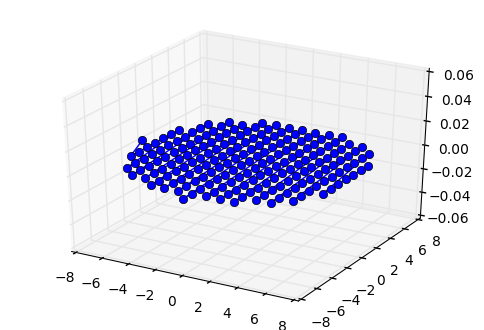

In [5]:
axis = [0,0,8] #hkr
x,y,z=shape_source(axis,0) #circle and location in z-axis
points = list_points(x,y,z)
pl3d = pl.figure().gca(projection = '3d')
pl.plot(x,y,z, marker = 'o')
pl.show()

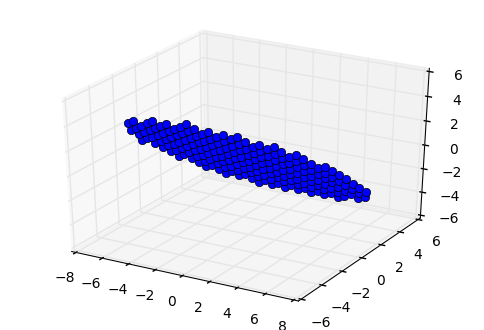

In [6]:
x1,y1,z1 = rotated_source(np.pi/4, axis, 0)
points2 = list_points(x1,y1,z1)
VectL = np.array([.5,1,1])
x2,y2,z2 = make_source(points2,VectL,20)

pl3d = pl.figure().gca(projection = '3d')
#for n in range (0,len(points2)):
    #pl3d.plot(x2[n],y2[n],z2[n], color = 'yellow')  
pl.plot(x1,y1,z1, marker = 'o', color = 'blue')

ax=pl.gca()
ax.hold(True)
pl.show()

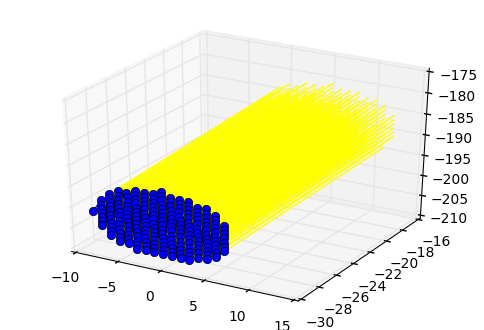

In [4]:
x3,y3,z3 = rotated_source(np.pi/2, axis, -30)
points3 = list_points(x3,y3,z3)
x4,y4,z4 = make_source(points3,VectL,20)
pl3d = pl.figure().gca(projection = '3d')
for n in range (0,len(points3)):
    pl3d.plot(x4[n],y4[n],z4[n], color = 'yellow')  
pl.plot(x3,y3,z3, marker = 'o')
ax=pl.gca()
ax.hold(True)
pl.show()

From here attempting to integrate steve's function for distribution of launch angles (which I have clearly been disregarding).

In [ ]:
def spec(n):
    x,y,z=[0],[0],[0]
    for i in np.arange(n):
        theta=np.arccos(uniform(-1,1))
        phi=np.random.uniform(0,2*np.pi)
        xt=np.sin(theta)*np.cos(phi)
        yt=np.sin(theta)*np.sin(phi)
        zt=np.cos(theta)
        if zt<0.:
            zt=-zt
        a=uniform(0,1)
        while a>zt:
            theta=np.arccos(uniform(-1,1))
            phi=np.random.uniform(0,2*np.pi)
            xt=np.sin(theta)*np.cos(phi)
            yt=np.sin(theta)*np.sin(phi)
            zt=np.cos(theta)
            if zt<0.:
                zt=-zt
            a=uniform(0,1)
        x=np.append(x,xt)
        y=np.append(y,yt)
        z=np.append(z,zt)
    return x,y,z


In [ ]:
xspec,yspec,zspec = spec(195)
pl3d = pl.figure().gca(projection = '3d')
pl3d.scatter(xspec,yspec,zspec,marker=".")
pl.show()

In [ ]:
def make_specsource(p,L):
    Lwant = int(L)
    x = []
    y = []
    z = []
    xspec,yspec,zspec = spec(len(p))
    for i in range (0,len(p)):
        Vi = [xspec[i], yspec[i], zspec[i]]
        xLi,yLi,zLi = make_line(points[i],Vi,Lwant)
        x.append(xLi)
        y.append(yLi)
        z.append(zLi)
    return x,y,z

In [ ]:
xspec,yspec,zspec = spec(len(points3))
for i in range (0, len(points3)):
    Vi = [xspec[i], yspec[i], zspec[i]]

#will try to implement different angles
#are these ANGLES or original POINTS? (here assuming they're angles)
#x3,y3,z3 = rotated_source(np.pi/2, axis, -30)
points3 = list_points(x3,y3,z3)

#use angles for VectL?
x4,y4,z4 = make_specsource(points3,20)
for n in range (0,len(points3)):
    pl3d.plot(x4[n],y4[n],z4[n], color = 'yellow')  
pl3d = pl.figure().gca(projection = '3d')
#pl.plot(x3,y3,z3, marker = 'o')
ax=pl.gca()
ax.hold(True)
pl.show()

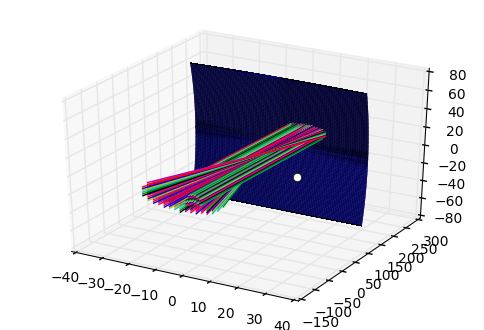

In [9]:
origin = [0,-64] #x,y
origin1 = [90,-64] #x,y
origin2 = [0,64]
origin3 = [90,64] #x,y 
coeffellipse = [263.9,256,64.15] 
#Centered around x-axis, not shifted, 
X12,Y12,Z12,X22,Y22,Z22 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin, 'pos')
#Centered around x-axis, shifted
X32,Y32,Z32,X42,Y42,Z42 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin1, 'pos')
#centered around x-axis, not shifted, reversed. APPROPRIATELY ADJUSTED FOR FOCI
X52,Y52,Z52,X62,Y62,Z62 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin2, 'neg')
#centered around x-axis, shifted, reversed. APPROPRIATELY ADJUSTED FOR FOCI
X72,Y72,Z72,X82,Y82,Z82 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin3, 'neg')

#now make a source accurately reflect off of this.
#not correctly made with respect to correct origin!
pl3dsurf = pl.figure().gca(projection = '3d')
#c = tangcoef(pli,v1,coeffellipse)
r = int(100)
p = [0,200,-50] #(x0,y0,z0)
v = [0.01,1,.01] #(a,b,c)
L = int(400)
coeffellipse = [263.9,256,64.15]
xi,yi,zi,xr,yr,zr,xp,yp,zp  = reflectellipse(coeffellipse,r,v,p,L)
xint,yint,zint = ellipselineint(p,v,coeffellipse)

pl3dsurf.plot([xint[0]],[yint[0]],[zint[0]], marker = 'o', color = 'white')

axis = [0,0,8] #hkr
#x,y,z=shape_source(axis,-50) #circle and location in z-axis
x4,y4,z4 = rotated_source(np.pi/2, axis, -60)
points4 = list_points(x4,y4,z4)
xi,yi,zi,xr,yr,zr,xp,yp,zp = reflect_sourceellipse(coeffellipse,r,v,points4,L)
for n in range (0,len(list_points(x4,y4,z4))):
    pl3dsurf.plot(xi[n],yi[n],zi[n])
    pl3dsurf.plot(xr[n],yr[n],zr[n])
    
#pl3dsurf.plot(xi,yi,zi, color = 'yellow')
#pl3dsurf.plot(xr,yr,zr, color = 'red')
pl3dsurf.plot_trisurf(X12,Y12,Z12, linewidth = .2, antialiased=True)
pl3dsurf.plot_trisurf(X22,Y22,Z22, linewidth = .2, antialiased=True)
ax=pl.gca()
ax.hold(True)

    
pl.show()
#be able to rotate the source (rotate around x axis with rotation matrix?)

figure out why k is affecting the height of the rotated source?

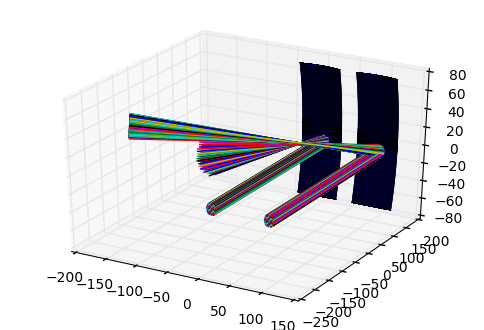

In [10]:
#now make two sources accurately reflect off of two ellipses
#now make a source accurately reflect off of this. WITH CORRECT ORIGIN
origin = [0,-64] #x,y
origin1 = [90,-64] #x,y
pl3dsurf = pl.figure().gca(projection = '3d')
#c = tangcoef(pli,v1,coeffellipse)
r = int(100)
p = [0,200,-50] #(x0,y0,z0)
v = [0.01,1,.01] #(a,b,c)
L = int(400)
coeffellipse = [263.9,256,64.15]
#xi,yi,zi,xr,yr,zr,xp,yp,zp  = reflectellipseshift(coeffellipse,r,v,p,L, origin)
#xint,yint,zint = ellipselineintshift(p,v,coeffellipse, origin)

#xi1,yi1,zi1,xr1,yr1,zr1,xp1,yp1,zp1  = reflectellipseshift(coeffellipse,r,v,p,L, origin1)
#xint1,yint1,zint1 = ellipselineintshift(p,v,coeffellipse, origin1)

#pl3dsurf.plot([xint[0]],[yint[0]],[zint[0]], marker = 'o', color = 'white')

axis = [0,0,8] #hkr
x,y,z=rotated_source(np.pi/3, axis,-30) #circle and location in z-axis
points = list_points(x,y,z)
xi,yi,zi,xr,yr,zr,xp,yp,zp = reflect_sourceellipseshift(coeffellipse,r,v,points,L, origin)
for n in range (0,len(list_points(x,y,z))):
    pl3dsurf.plot(xi[n],yi[n],zi[n])
    pl3dsurf.plot(xr[n],yr[n],zr[n])

axis1 = [80,0,8] #hkr
x1,y1,z1=rotated_source(np.pi/3, axis,-30) #circle and location in z-axis
points1 = list_points(x1,y1,z1)
xi1,yi1,zi1,xr1,yr1,zr1,xp1,yp1,zp1 = reflect_sourceellipseshift(coeffellipse,r,v,points1,L, origin1)
for n in range (0,len(list_points(x1,y1,z1))):
    pl3dsurf.plot(xi1[n],yi1[n],zi1[n])
    pl3dsurf.plot(xr1[n],yr1[n],zr1[n])
    
#pl3dsurf.plot(xi,yi,zi, color = 'yellow')
#pl3dsurf.plot(xr,yr,zr, color = 'red')
pl3dsurf.plot_trisurf(X12,Y12,Z12, linewidth = .2, antialiased=True)
pl3dsurf.plot_trisurf(X22,Y22,Z22, linewidth = .2, antialiased=True)

pl3dsurf.plot_trisurf(X32,Y32,Z32, linewidth = .2, antialiased=True)
pl3dsurf.plot_trisurf(X42,Y42,Z42, linewidth = .2, antialiased=True)
ax=pl.gca()
ax.hold(True)

    
pl.show()